In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Libraries pandas for data frames , numpy for array operations , matplotlib and seaborn for visualization #

In [2]:
K={"x": [1, 2, 3, 4,5,6,7,8,9,10], "y": [100, 200, 500, 600,900,920,940,980,1100,1500]}

df = pd.DataFrame(K)
print("The DataFrame: ")
print(df)


# creating new data frame by joining values of x and y #

The DataFrame: 
    x     y
0   1   100
1   2   200
2   3   500
3   4   600
4   5   900
5   6   920
6   7   940
7   8   980
8   9  1100
9  10  1500


In [3]:
df.isnull().sum()
 # preprocessing - checking whether there is persence of null value  #

x    0
y    0
dtype: int64

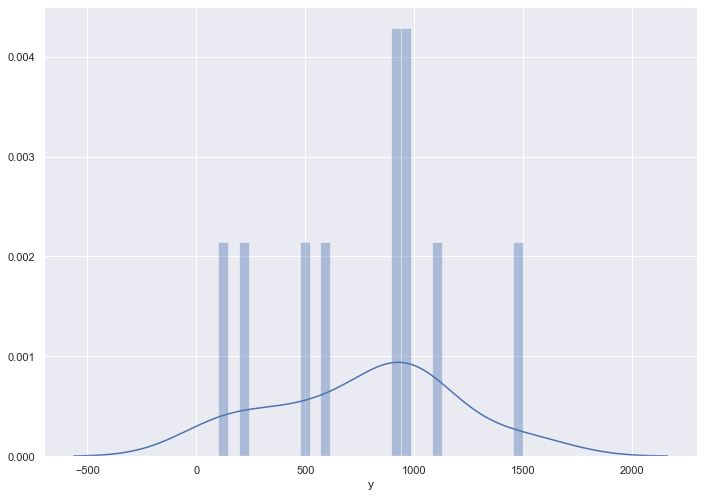

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['y'],bins=30)
plt.show()

# plotting graph of y - sns is seaborn for better visualization effect #

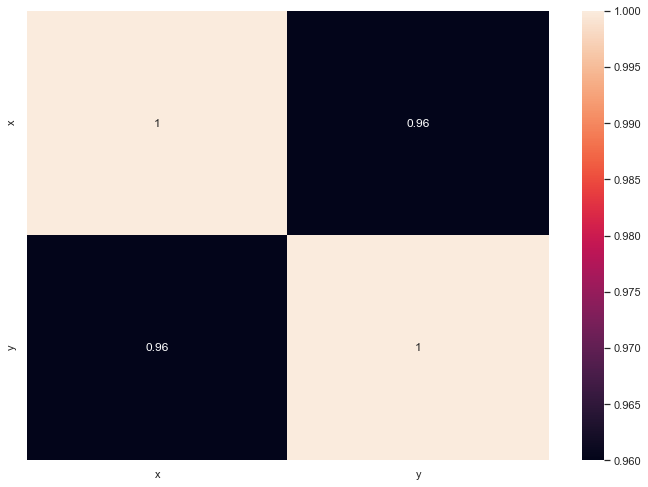

In [5]:
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Here we are finsing actual correlation between x and y
# heatmap will give the clear picture of ranging value

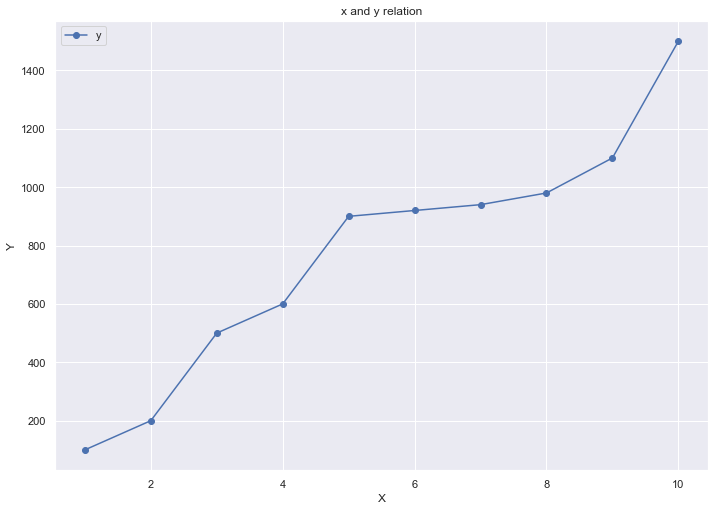

In [27]:

df.plot(x='x',y='y',marker='o')
plt.title('x and y relation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# plotting the graphs

In [57]:
from sklearn.model_selection import train_test_split
X=df['x']
Y=df['y']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# train and test datas are  being splitted from dataset using train_test_split function

(7,)
(3,)
(7,)
(3,)


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 # scikit library called, linear Regression library , root mean square error library ,r2 score is called

In [59]:
X_train = np.array(X_train).reshape(-1, 1)
Y_train = np.array(Y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)
 # converting all 1D in to 2D using reshape

In [60]:

#define a linear_regression variable 
lin_model= LinearRegression()


#apply the linear_regression model to the trainning set
lin_model.fit(X_train,Y_train)

# Linear regression function called 

LinearRegression()

In [61]:
Y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2=r2_score(Y_train,Y_train_predict)
print('----------model performances of training set---------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# training set performance is calculated

----------model performances of training set---------
RMSE is 106.4161865596807
R2 score is 0.9170013411910175


In [62]:
Y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2=r2_score(Y_test,Y_test_predict)
print('----------model performances of testing set---------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
# testing set performance is calculated

----------model performances of testing set---------
RMSE is 142.59866274582734
R2 score is 0.8790260394288182


In [64]:
print("the model coefficient is : ",lin_model.coef_)
print("the model intercept is : " , lin_model.intercept_)

# as we know the simple line equation y=b0+b1*x
# Here  b0 as coefficient and b1 as intercept 

the model coefficient is :  [[126.35416667]]
the model intercept is :  [38.75]


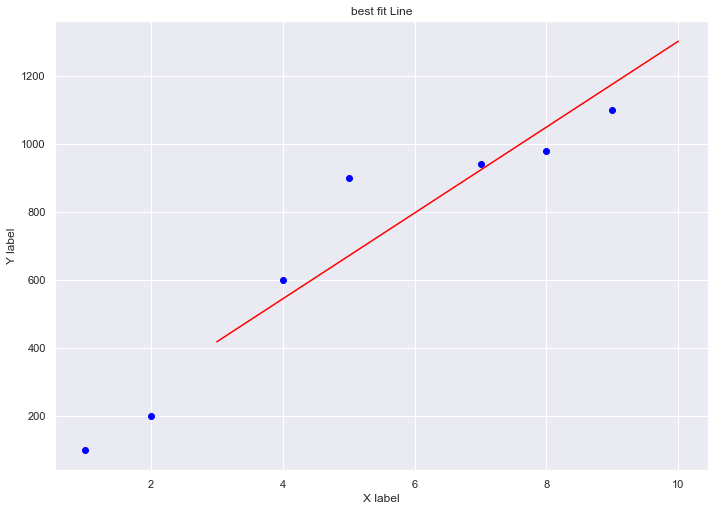

In [70]:
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_test, Y_test_predict, color = "red")
plt.title("best fit Line")
plt.xlabel("X label")
plt.ylabel("Y label")
plt.show()

# plotting the best fit line using testing set